In [1]:
import numpy as np
import pandas as pd
import time
import tqdm
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pymorphy2
import warnings
warnings.filterwarnings("ignore")

In [3]:
import glob
import os
import matplotlib
import artm
import nltk
import feedparser
from nltk.corpus import stopwords
"""nltk.download('stopwords')
nltk.download('punkt')
#nltk.download()"""

"nltk.download('stopwords')\nnltk.download('punkt')\n#nltk.download()"

In [5]:
import difflib
from functools import partial
from sklearn.decomposition import NMF

In [6]:
data = pd.read_csv('lemm.csv');
data = data.fillna('')

In [5]:
def sex(a):
    if a['male'] > a['female']:
        a['sex'] = 1
    if a['male'] < a['female']:
        a['sex'] = 2

    return a

In [6]:
data = data.apply(sex, axis=1)

In [7]:
data.tail()

,ID,Revisit,female,futr,lemm,male,past,pres,sex,text,without rare,Анамнез заболевания,Внешний осмотр,Возраст,Диагноз,Код_диагноза,Общее состояние,Пол,аллергия
283081,283081,1,2,0,травма нед назад упасть улица обращаться рентг...,0,2,0,2.0,травма нед назад упала на улице обращалась в ...,травма нед назад упала улице обращалась рентге...,Травма 3нед. назад - упала на улице. Обращалас...,,46,Нетоксический одноузловой зоб,E04.1,,2,
283082,283082,1,0,0,,0,0,0,NaN,,,,,68,Гинекологическое обследование (общее) (рутинное),Z01.4,Состояние удовлетворительное .,2,не отягощен
283083,283083,1,0,0,,0,0,0,NaN,,,,,36,Кератит,H16,,1,Аллергию на лекарства - отрицает
283084,283084,1,3,0,обратиться осмотр беременность неделя течение ...,0,3,0,2.0,обратилась для осмотра при беременности недел...,обратилась осмотра беременности недель течение...,обратилась для осмотра при беременности 35 нед...,,33,Острый назофарингит (насморк),J00,,2,
283085,283085,1,0,0,дополнение,0,0,0,NaN,без дополнений,дополнений,без дополнений.,,42,Хронический тубулоинтерстициальный нефрит,N11,,2,


In [9]:
a = str(data['sex'].fillna(0).apply(int).tolist())
b = str(data['Пол'].tolist())

In [ ]:
matcher = difflib.SequenceMatcher(a=a, b=b, autojunk=False)
matcher.find_longest_match(0, len(a), 0, len(b))

In [ ]:
def apply_sm(s, c1, c2): 
    return difflib.SequenceMatcher(None, s[c1], s[c2]).ratio()

# df = pd.DataFrame({'A': {1: 'one'}, 'B': {1: 'two'}})
print(data.apply(partial(apply_sm, c1='sex', c2='Пол'), axis=1))

In [ ]:
matcher = difflib.SequenceMatcher(a=data['sex'], b=data['Пол'])
for block in matcher.get_matching_blocks():
    if block.size < 6:
        continue
    print(data[block.a:block.a+block.size])

In [ ]:
find_longest_match

In [ ]:
all_lemm = np.concatenate(data['lemm'].apply (lambda s: s.strip().split()))
bugwords_lemm = pd.Series(all_lemm).unique()

In [ ]:
dictionary = artm.Dictionary()

model_plsa = artm.ARTM(topic_names=['topic_{}'.format(i) for i in range(15)],
                       scores=[artm.PerplexityScore(name='PerplexityScore',
                                                    dictionary=dictionary)],
                       cache_theta=True)

model_artm = artm.ARTM(topic_names=['topic_{}'.format(i) for i in range(15)],
                       scores=[artm.PerplexityScore(name='PerplexityScore',
                                                    dictionary=dictionary)],
                       regularizers=[artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-0.15)],
                       cache_theta=True)

In [8]:
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 
train_data_features = vectorizer.fit_transform(all_lemm[:700000])

train_data_features = train_data_features.toarray()

In [9]:
train_data_features.shape

(700000, 5000)

In [10]:
vocab = vectorizer.get_feature_names()
print (vocab)

['аборт', 'абсцесс', 'абтерапия', 'авамис', 'авария', 'август', 'авелокс', 'авиаперелёт', 'автобус', 'автомобиль', 'адаптировать', 'адаптол', 'адванс', 'адвантан', 'адекватный', 'аденовирусный', 'аденоид', 'аденокарцинома', 'аденома', 'аденомиоз', 'азатиоприн', 'азитромицин', 'аит', 'аква', 'аквадетрим', 'аквалор', 'аквамарис', 'аквамариса', 'аккомодация', 'акласт', 'акридерма', 'акробатика', 'акромиальноключичный', 'акромиоключичный', 'акс', 'аксиальный', 'акт', 'активированный', 'активно', 'активность', 'активный', 'актовегин', 'акушерагинеколог', 'акция', 'акш', 'ала', 'алергоанамнез', 'алкоголь', 'алкогольный', 'аллапинин', 'аллерген', 'аллергический', 'аллергия', 'аллергоанамнез', 'аллерголог', 'аллергологическоеиммунологический', 'аллергологй', 'аллопуринол', 'алма', 'алта', 'алфлутоп', 'альбуцид', 'альмагель', 'альфа', 'альфанормикс', 'амарил', 'амб', 'амбробен', 'амбулаторно', 'амбулаторный', 'амелотекс', 'амиксина', 'амитриптилин', 'амлодипин', 'амоксиклав', 'амоксициллин', 'а

In [11]:
dist = np.sum(train_data_features, axis=0)

# For each, print the vocabulary word and the number of times it 
# appears in the training set
for tag, count in zip(vocab, dist):
    print (count, tag)

25 аборт
27 абсцесс
29 абтерапия
11 авамис
13 авария
381 август
15 авелокс
15 авиаперелёт
13 автобус
35 автомобиль
376 адаптировать
16 адаптол
7 адванс
25 адвантан
8 адекватный
8 аденовирусный
7 аденоид
10 аденокарцинома
41 аденома
43 аденомиоз
7 азатиоприн
33 азитромицин
57 аит
30 аква
8 аквадетрим
58 аквалор
11 аквамарис
100 аквамариса
13 аккомодация
14 акласт
26 акридерма
9 акробатика
21 акромиальноключичный
9 акромиоключичный
10 акс
28 аксиальный
96 акт
18 активированный
57 активно
72 активность
161 активный
50 актовегин
7 акушерагинеколог
100 акция
7 акш
10 ала
50 алергоанамнез
75 алкоголь
13 алкогольный
14 аллапинин
149 аллерген
212 аллергический
71 аллергия
53 аллергоанамнез
52 аллерголог
331 аллергологическоеиммунологический
9 аллергологй
21 аллопуринол
10 алма
38 алта
35 алфлутоп
22 альбуцид
25 альмагель
27 альфа
24 альфанормикс
9 амарил
42 амб
124 амбробен
140 амбулаторно
485 амбулаторный
7 амелотекс
77 амиксина
11 амитриптилин
49 амлодипин
147 амоксиклав
49 амоксициллин
13 а

8 инвалидность
9 инвитро
7 ингаверин
226 ингавирина
18 ингалипт
28 ингалляция
59 ингаляционный
194 ингаляция
29 индапамид
24 индивидуальный
7 индия
18 индоколлир
20 индометацин
12 инициация
54 инородный
10 инсоляция
9 инст
25 инстилляция
42 институт
12 инструментальный
24 инсулин
7 инсулинорезистентность
15 инсульт
8 интенсивно
284 интенсивность
203 интенсивный
8 интервал
8 интерпретация
8 интим
41 интимный
11 интракраниальный
11 интрамедуллярный
7 инф
100 инфаркт
10 инфекционист
46 инфекционный
510 инфекция
25 инфильтрат
13 инфильтративноотечный
9 инфильтративный
11 инфильтрация
7 инфицировать
13 информация
10 инфузионный
18 инфузия
190 инъекция
10 иньекция
13 иол
9 ипп
62 ипппа
14 иридоциклит
20 ирифрина
8 ирмть
456 иррадиация
108 иррадиировать
152 ирт
66 исключать
9 исключаться
99 исключение
161 исключить
39 искривление
11 испания
82 использование
312 использовать
98 испытывать
27 иссечение
344 исследование
33 исследовать
34 исход
7 исходный
17 исчезать
80 исчезновение
74 исчезнуть


355 ощущение
24 падать
282 падение
143 пазуха
7 паицентка
11 паксила
412 палец
42 палочка
6 палочковый
32 пальпация
50 память
27 панавира
6 панадол
13 панангин
6 панзинорма
54 83 поражение
14 порка
11 порошок
17 порция
68 порядок
97 посев
21 посезонно
11 посетить
66 посещать
157 посещение
7 поскользнуться
20 послабление
10 послдение
12 последнии
5292 последний
34 последствие
153 последующий
8 посление
113 послеоперационный
11 послеродовой
180 послужить
145 послый
6 посоветовать
6 пост
206 поставить
11 постановка
6 постель
8 постельный
251 постепенно
101 постепенный
9 постинфарктный
27 постконтузионный
7 постменопауза
9 постоперационный
581 постоянно
567 постоянный
12 постпрандиальный
24 посттравматический
8 поступить
12 поступление
7 пот
6 потемнение
9 потемнеть
147 потеря
59 потерять
88 потливость
6 потоотделение
35 потребность
6 потребовать
12 поход
6 походить
36 походка
46 похожий
13 похолодание
9 похудание
54 похуделый
94 почечный
463 почка
187 почувствовать
9 пошатывание
11 пошлый

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 2) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest = forest.fit( train_data_features, data["Revisit"] )

MemoryError: 

In [21]:

# Create an empty list and append the clean reviews one by one
num_reviews = len(data["lemm"])
clean_test_reviews = [] 

print ("Cleaning and parsing the test set movie reviews...\n")
for i in range(0,num_reviews):
    if( (i+1) % 1000 == 0 ):
        print ("Review %d of %d\n" %i+1, num_reviews)
    clean_review = review_to_words( data["lemm"][i] )
    clean_test_reviews.append( clean_review )

# Get a bag of words for the test set, and convert to a numpy array
test_data_features = vectorizer.transform(clean_test_reviews)
test_data_features = test_data_features.toarray()

# Use the random forest to make sentiment label predictions
result = forest.predict(test_data_features)

# Copy the results to a pandas dataframe with an "id" column and
# a "sentiment" column
output = pd.DataFrame( data={"id":test["id"], "sentiment":result} )

# Use pandas to write the comma-separated output file
output.to_csv( "Bag_of_Words_model.csv", index=False, quoting=3 )

Cleaning and parsing the test set movie reviews...



NameError: name 'review_to_words' is not defined

In [11]:
data[data['lemm']!='']

,ID,Код_диагноза,Диагноз,Возраст,Пол,Общее состояние,аллергия,Анамнез заболевания,Внешний осмотр,Revisit,text,past,pres,futr,male,female,without rare,lemm
1,1,N76.1,Подострый и хронический вагинит,45,2,,,считает себя больной на протяжении многих лет....,,1,считает себя больной на протяжении многих лет ...,2,4,0,0,2,считает больной протяжении многих лет появилас...,считать больной протяжение многий год появитьс...
2,2,L23.9,"Аллергический контактный дерматит, причина не ...",63,2,,,"Болен около 2-х дней, когда появились описанны...",,1,болен около х дней когда появились описанные ж...,3,0,0,2,0,болен около дней появились описанные жалобы са...,больной около день появиться описать жалоба са...
4,4,Z00.0,Общий медицинский осмотр,29,1,,,провела полное обследование для оперативного л...,,1,провела полное обследование для оперативного л...,1,0,0,0,1,провела полное обследование оперативного лечения,провести полный обследование оперативный лечение
6,6,M23.2,Поражение мениска в результате старого разрыва...,42,2,,,"проводит лечение, прибыла для коррекции назнач...",,1,проводит лечение прибыла для коррекции назначений,1,1,0,0,1,проводит лечение прибыла коррекции назначений,проводить лечение прибыть коррекция назначение
7,7,E05.0,Тиреотоксикоз с диффузным зобом,85,1,,,Вышеописанные жалобы беспокоят с 03.12.17. Об...,,0,вышеописанные жалобы беспокоят с обращался к...,3,2,0,2,0,вышеописанные жалобы беспокоят обращался невро...,вышеописанный жалоба беспокоить обращаться нев...
9,9,H60,Наружный отит,38,1,,,Ранее к эндокринологу не обращалась и не обсле...,,1,ранее к эндокринологу не обращалась и не обсле...,2,0,0,0,2,ранее эндокринологу обращалась обследовалась,ранее эндокринолог обращаться обследоваться
10,10,H52.2,Астигматизм,25,2,,,Вышеописанные жалобы беспокоят около 5 лет. Ле...,,1,вышеописанные жалобы беспокоят около лет лечи...,1,1,0,0,1,вышеописанные жалобы беспокоят около лет лечил...,вышеописанный жалоба беспокоить около год лечи...
11,11,K30,Диспепсия,51,1,,,Пришла по результатам обследования,,0,пришла по результатам обследования,0,0,0,0,0,пришла результатам обследования,пришлый результат обследование
12,12,K29.9,Гастродуоденит неуточненный,52,2,,,"контроль лечения; дополнений к анамнезу нет, л...",,1,контроль лечения дополнений к анамнезу нет леч...,0,3,0,0,0,контроль лечения дополнений анамнезу лечение п...,контроль лечение дополнение анамнез лечение пе...
13,13,M42.1,Остеохондроз позвоночника у взрослых,56,2,,,"на фоне проведенной терапии, со слов матери, у...",,0,на фоне проведенной терапии со слов матери уве...,0,1,0,0,0,фоне проведенной терапии слов матери увеличени...,фон провести терапия слово матерь увеличение э...


In [7]:
not_empty_data = data[data['lemm']!='']

In [13]:
n_features = 10000
vectorizer = TfidfVectorizer(min_df=3, max_features=n_features)

n_wd = vectorizer.fit_transform(not_empty_data['lemm']).todense().T
vocabulary = vectorizer.get_feature_names()

#tfidf = vectorizer.fit_transform(data['lemm'])
#feature_names = vectorizer.get_feature_names()

In [14]:
print(n_wd.shape[0], n_wd.shape[1])
print(n_wd.transpose())

10000 203522
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [17]:
M = tfidf.transpose
f = open('termdoc.txt', 'w', encoding = 'utf-8')
for i in tqdm.tqdm_notebook(range(tfidf.shape[0])):
    f.write('doc'+str(i))
    for j in range(tfidf.shape[1]):
        if(tfidf[i,j]>0):
            f.write(' '+feature_names[j]+':'+str(tfidf[i,j]))
    f.write('\n')
f.close()

HBox(children=(IntProgress(value=0, max=283086), HTML(value='')))

KeyboardInterrupt: 

In [15]:
bv = artm.BatchVectorizer(data_format='bow_n_wd', n_wd=n_wd, vocabulary=vocabulary)

In [16]:
def phi_to_df(model, num_top_tokens=10):
    topics_top_words = []

    phi = model.get_phi()
    for topic_name in phi.columns:
        topic_top_words = phi[topic_name].sort_values(inplace=False, ascending=False).iloc[range(0, num_top_tokens)]
        topics_top_words.append(topic_top_words.index)

    return pd.DataFrame(topics_top_words)

In [17]:
# batch_vectorizer = artm.BatchVectorizer(data_path='termdoc.txt',
#                                         data_format='vowpal_wabbit',
#                                         target_folder='my_collection_batches_transactions_data', gather_dictionary = True)

# print(batch_vectorizer.dictionary)
print(bv)
model = artm.ARTM(num_topics=15, dictionary=bv.dictionary, cache_theta=True, show_progress_bars=True)


model.scores.add(artm.PerplexityScore(name='perplexity_score',
                                      dictionary=bv.dictionary))
model.scores.add(artm.SparsityPhiScore(name='sparsity_phi_score'))
model.scores.add(artm.SparsityThetaScore(name='sparsity_theta_score'))
model.scores.add(artm.TopTokensScore(name='top_tokens_score'))


artm.BatchVectorizer(data_path="urnuuid580fde5a-3370-11e8-82a2-6c71d9ffc909", num_batches=204)


In [21]:
model.fit_offline(bv, num_collection_passes=30)

HBox(children=(IntProgress(value=0, description='Pass', max=30), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch', max=204), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch', max=204), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch', max=204), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch', max=204), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch', max=204), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch', max=204), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch', max=204), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch', max=204), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch', max=204), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch', max=204), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch', max=204), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch', max=204), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch', max=204), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch', max=204), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch', max=204), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch', max=204), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch', max=204), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch', max=204), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch', max=204), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch', max=204), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch', max=204), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch', max=204), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch', max=204), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch', max=204), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch', max=204), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch', max=204), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch', max=204), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch', max=204), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch', max=204), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch', max=204), HTML(value='')))

In [23]:
phi_to_df(model)

,0,1,2,3,4,5,6,7,8,9
0,связывать,лечиться,заболевание,самостоятельно,обращаться,ранее,начать,дерматолог,дать,появление
1,дополнение,анамнез,терапия,фон,отмечать,переносить,уменьшение,лечение,провести,улучшение
2,консультировать,нос,глаз,цель,день,помощь,капля,эффект,использовать,визит
3,боль,мес,отрицать,отдел,позвоночник,травма,синдром,болевой,появиться,выше
4,больной,считать,головной,принимать,цифра,боль,препарат,физический,нагрузка,повышение
5,сустав,левый,правый,травма,коленный,область,упасть,дискомфорт,право,быт
6,несколько,динамика,обследоваться,усиление,отрицательный,неврологический,статус,последний,месяц,образование
7,фон,лечение,принимать,сохраняться,кашель,диагноз,находиться,тело,орвать,отмечать
8,консультация,провести,обследование,лечение,коррекция,пациент,контрольный,получить,специалист,реабилитация
9,явиться,резтам,анализ,обследование,беременность,наблюдаться,хронический,выявить,узи,повод


In [25]:
scores = {}
scores['perplexity_score'] = model.score_tracker['perplexity_score'].value
scores['sparsity_phi_score'] = model.score_tracker['sparsity_phi_score'].value
#scores['TopicKernelScore_contrast'] = model.score_tracker['TopicKernelScore'].average_contrast
#scores['TopicKernelScore_purity'] = model.score_tracker['TopicKernelScore'].average_purity
scores['sparsity_theta_score'] = model.score_tracker['sparsity_theta_score'].value
#scores['top_tokens_score'] = model.score_tracker['top_tokens_score'].value
# scores['TopCoherence10'] = model.score_tracker['TopTokensScore10'].average_coherence
# scores['TopCoherence30'] = model.score_tracker['TopTokensScore30'].average_coherence

#scores['time'] = time.time() - start_time

scores_df = pd.DataFrame(scores)

scores_df

,perplexity_score,sparsity_phi_score,sparsity_theta_score
0,8474.402344,0.000000,0.000175
1,818.007019,0.000047,0.009863
2,602.668457,0.001280,0.063060
3,489.942810,0.009227,0.121983
4,435.296051,0.024193,0.181042
5,407.075165,0.043320,0.232902
6,390.313904,0.069553,0.267606
7,379.533142,0.105020,0.289720
8,370.871613,0.148900,0.308854
9,364.584412,0.198100,0.324107


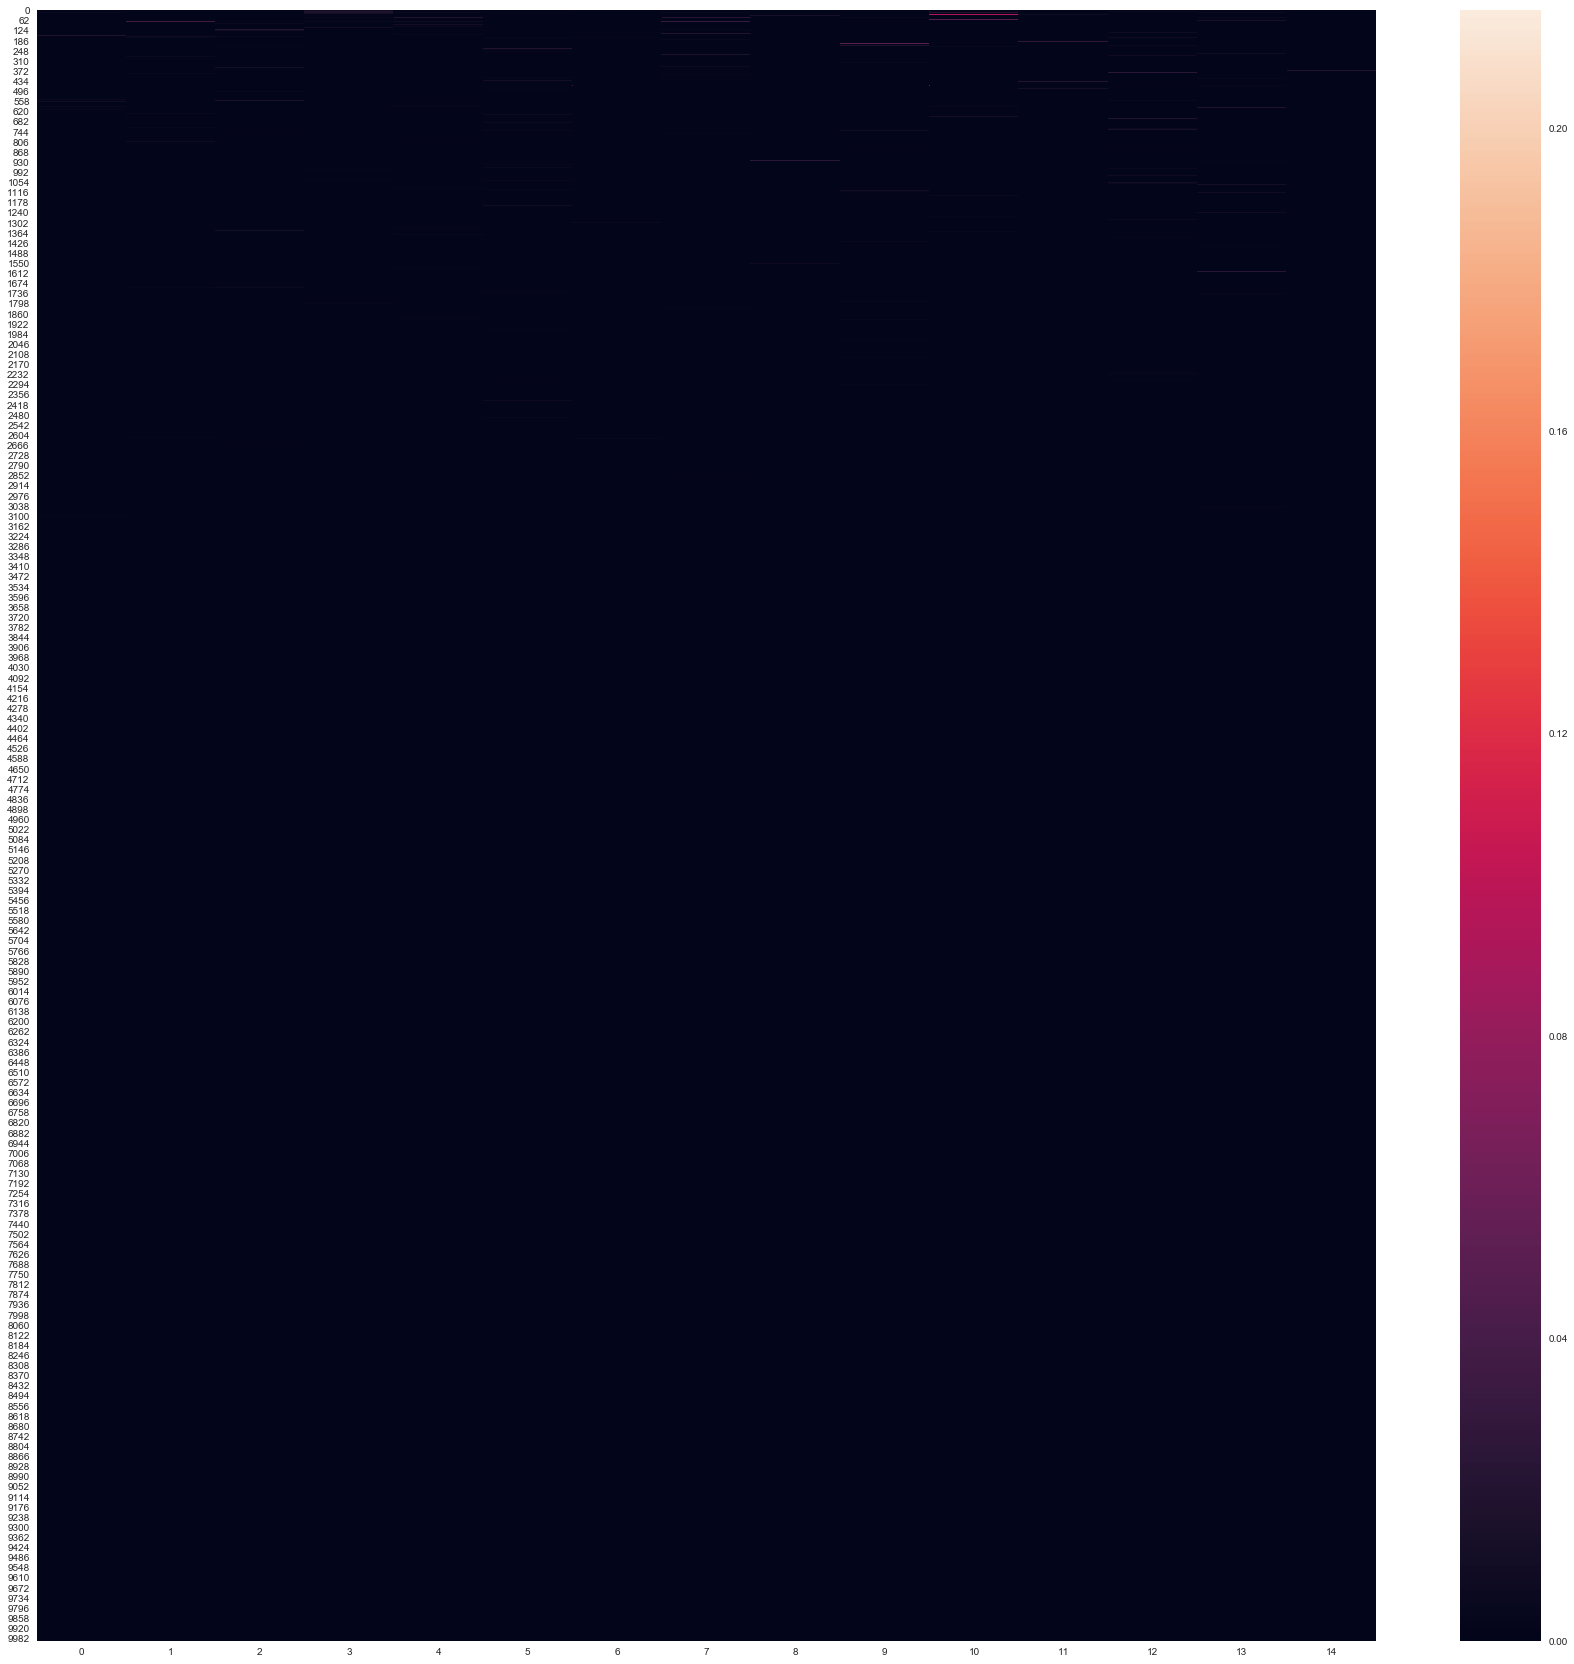

In [28]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()
phi = model.get_phi(topic_names=model.topic_names)
plt.figure(figsize=(30, 30))
sns.heatmap(phi.as_matrix())
plt.savefig('phi.png', dpi=600)

HBox(children=(IntProgress(value=0, description='Batch', max=204), HTML(value='')))

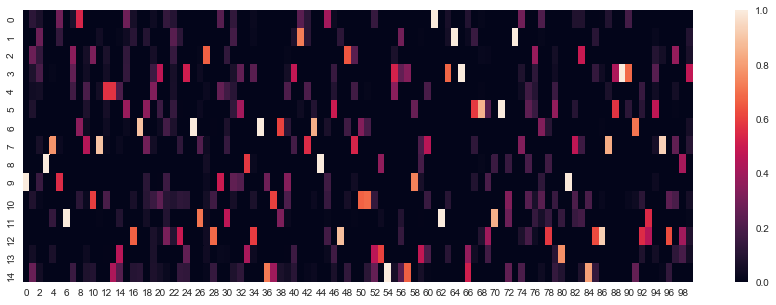

In [56]:
theta = model.transform(batch_vectorizer=bv)
plt.figure(figsize=(15, 5))
sns.heatmap(theta.iloc[:, :100].as_matrix())

In [69]:
pd.options.display.float_format = '{:,.2f}'.format
theta.T.iloc[0]

topic_0    0.00
topic_1    0.00
topic_2    0.00
topic_3    0.00
topic_4    0.00
topic_5    0.00
topic_6    0.00
topic_7    0.00
topic_8    0.00
topic_9    1.00
topic_10   0.00
topic_11   0.00
topic_12   0.00
topic_13   0.00
topic_14   0.00
Name: 92000, dtype: float32

In [70]:
not_empty_data.iloc[0]['Анамнез заболевания']

'считает себя больной на протяжении многих лет.  Появилась боль и скованность в спине.  По словам паицентки в настоящее время занимается конным спортом и появляется боль и скованность в поясничном отделе позвончника.  В ближайшее время пациентка планирует беременность и поэтому обратилась  к неврологу.'

In [76]:
pd.options.display.max_colwidth = 1000

n = 13
threshold = 0.9
topic = theta.loc['topic_{}'.format(n)] 
topic_docs = topic[topic > threshold]
# topic_docs

not_empty_data.iloc[topic_docs.index][['Анамнез заболевания']]

,Анамнез заболевания
127997,"лечение проводит,прибыла для контроля."
128000,после окончания месячных с 09.02 появились мажущиеся сукровичные выделения
128640,"провела лечение кольпита кандидоза ,выделения прекратились.Явилась на контроль"
54468,"закончила назначенную терапию кольпита ,выделения не беспокоят,явилась на контроль"
54550,"закончила противовоспалительное лечение с положительным эффектом, начала прием дюфастона по схеме"
54581,проводит назначенное лечение
55088,менструация началась 09.04.17
55132,П\м 26 декабря. АД - 110\65.
215619,май-менструаций не было июнь-не было июль-15 по 25.07.17 август-не было сентябрь28.09.17
216809,закончила назначенное лечение


,Анамнез заболевания
128144,"Данные на 17.07.2015 г.Жалобы (насморк, эпизоды немотивированной заложенности носа (затруднения носового дыхания), ощущение стекания слизи по задней стенке глотки, в анамнезе: зуд в носу, чихание, покраснение глаз, зуд в глазах) беспокоят длительное время.Настоящее обострение ринита- в течение нескольких недель.Врачом-аллергологом-иммунологом не консультирован(а). Специфическое аллергологическое/иммунологическое обследование не проходил(а). Цель визита- консультация и обследование (при необходимости)."
54488,"много лет, постоянно применяет сосудосуживающие капли в нос без существенного эффекта."
280142,"Данные на 16.01.2017 г. Жалобы (насморк, заложенность носа (затруднение носового дыхания), приступы чихания, снижение обоняния, слезотечение, зуд в глазах) беспокоят сезонно в весеннее время года, начиная с 2012 года. Врачом-аллергологом-иммунологом не консультирован(-а). Специфическое аллергологическое/иммунологическое обследование не проходил(-а). Цель визита- консультация и обследование (при необходимости). Данные на 23.01.2017 г.Самочувствие удовлетворительное. Явка на дообследование (проведение КСП)."
251678,"Данные на 27.01.2017 г. .На приёме с мамой. Жалобы (сезонные (весенние) проявления аллергического риноконъюнктивита) беспокоят с 4-х лет жизни. Врачом-аллергологом-иммунологом консультирован(-а) неоднократно. Специфическое аллергологическое/иммунологическое обследование проходил(-а). При КСП и ""ин витро"" выявлялась сенсибилизация к пыльце деревьев, сорных трав, луговых трав и кошке. Несколько лет проходил ПкАСИТ водно-солевыми пыльцевыми экстрактами. Цель визита- консультация и обследование (при необходимости)."
100229,26.03.16 - двусторонняя тонзиллэктомия
100414,"Данные на 21.09.2016 г.Жалобы (частый прозрачный насморк, эпизоды немотивированной длительной заложенности носа (затруднения носового дыхания), зуд в носу, приступы чихания) беспокоят несколько лет круглогодично .с ухудшением с весны 2016 года.Консультирован(-а) ЛОР-врачом, заключение: Аллергический ринит?Связывет с контактом с ингаляционными аллергенами (пыль, .пыльца, животные, .плесень) и с пищей (что конкретно не понимает).Было назначено лечение (Назонекс"") в соответствии со стандартом оказания медицинской помощи с улучшением, однако явления ринита рецидивируют..Врачом-аллергологом-иммунологом консультирован(-а) несколько лет назад. Специфическое аллергологическое/иммунологическое обследование проходил(-а) не полностью. Достоверно результатов не знает (медицинские документы не предоставлены).Цель визита- консультация и обследование (при необходимости)."
45654,"Данные на 20.07.2015 г.Жалобы (насморк, эпизоды немотивированной заложенности носа (затруднения носового дыхания), периодический зуд в носу и чихание, ощущение стекания слизи по задней стенке глотки, слезотечение, покраснение глаз, зуд в глазах, чувство ""песка"" в глазах) беспокоят несколько лет .с ухудшением в весенне-летнее время года.Связывет с контактом с ингаляционными аллергенами (пыль, пыльца, животные).Настоящее обострение риноконъюнктивита- в течение нескольких недель.Связывет с контактом с ингаляционными аллергенами (пыль, пыльца, животные).Врачом-аллергологом-иммунологом не консультирован(а). Специфическое аллергологическое/иммунологическое обследование не проходил(а). Цель визита- консультация и обследование (при необходимости)."
7025,"больна 6й день, полоскает горло различными антиссептиками (фурациллин, мирамистин, хлоргекседин), без достаточного эффекта"
218171,"Данные на 20.01.2017 г.Жалобы (высыпания на кожных покровах с зудом) беспокоят многие годы..Связывает с бытовыми (пыль, клещи), грибковыми аллергенами и с пищей (что конкретно, не понимает). Неоднократно консультирован(-а) врачом-дерматологом, последнее заключение: Аллергический дерматит неуточнённый. Настоящее обострение кожного синдрома- в течение нескольких недель.Врачом-аллергологом-иммунологом никогда не консультирован(-а). Специфическое аллергологическое/иммунологическое обследование ни

In [45]:
not_empty_data[not_empty_data['Анамнез заболевания'] == 'провериться']

,ID,Код_диагноза,Диагноз,Возраст,Пол,Общее состояние,аллергия,Анамнез заболевания,Внешний осмотр,Revisit,text,past,pres,futr,male,female,without rare,lemm
2772,2772,N77.1*,"Вагинит, вульвит и вульвовагинит при инфекционных и паразитарных болезнях, классифицированных в других рубриках",30,2,,,провериться,,1,провериться,0,0,0,0,0,провериться,провериться
3391,3391,J00,Острый назофарингит (насморк),31,2,,,провериться,,1,провериться,0,0,0,0,0,провериться,провериться
3417,3417,E05.0,Тиреотоксикоз с диффузным зобом,27,2,,,провериться,,1,провериться,0,0,0,0,0,провериться,провериться
3567,3567,N70.1,Хронический сальпингит и оофорит,39,2,,,провериться,,0,провериться,0,0,0,0,0,провериться,провериться
3837,3837,D25,Лейомиома матки,50,2,,,провериться,,1,провериться,0,0,0,0,0,провериться,провериться
5347,5347,G40.9,Эпилепсия неуточненная,36,2,,,провериться,,1,провериться,0,0,0,0,0,провериться,провериться
6447,6447,N41.1,Хронический простатит,49,1,,,провериться,,1,провериться,0,0,0,0,0,провериться,провериться
9017,9017,L71.0,Периоральный дерматит,29,2,,,провериться,,0,провериться,0,0,0,0,0,провериться,провериться
9530,9530,N76.0,Острый вагинит,28,2,,,провериться,,0,провериться,0,0,0,0,0,провериться,провериться
9560,9560,J00,Острый назофарингит (насморк),28,1,,,провериться,,1,провериться,0,0,0,0,0,провериться,провериться
